In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import multivariate_normal
from scipy.stats import norm
from numpy import random as rd
from scipy import stats

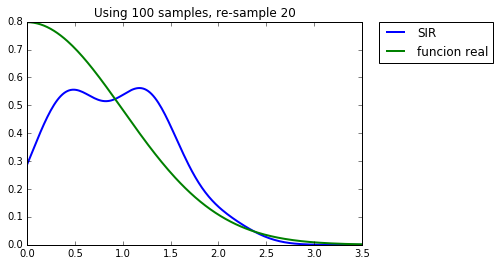

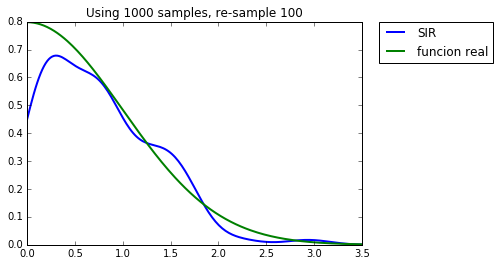

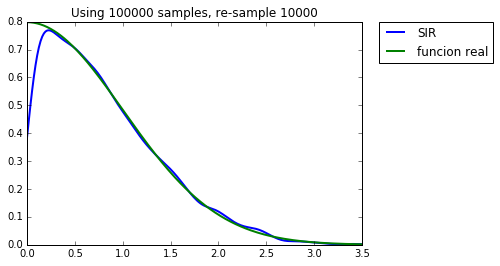

In [30]:
k = np.sqrt(np.exp(1))

def q(z):
    return np.exp(-z)

def draw_q(n):
    return rd.exponential(size=n)

    
def pt(z):
    return np.exp((-z ** 2) / 2.0)

def pz(z):
    return (2.0 / np.sqrt(2.0 * np.pi)) * np.exp(- (z ** 2) / 2.0)

def comp_w(n):
    s = draw_q(n)
    w = pt(s) / q(s)
    den = np.sum(w)
    w = w / den
    assert (abs(np.sum(w) - 1) < 1e-10)
    return s, w


Nexp = [100, 1000, 100000]
Nrem = [20, 100, 10000]

for k in range(len(Nexp)):
    n = Nexp[k]
    r = Nrem[k]
    s,w = comp_w(n)
    accu = np.copy(w)
    for i in range(1, n):
        accu[i] += accu[i - 1]
    
    samples = []
    for i in range(r):
        index = np.searchsorted(accu, rd.uniform())
        samples.append(s[index])
    
    kernel = stats.gaussian_kde(samples)
    # plt.plot(s, w, '.')
    x = np.linspace(0, 3.5, 200)
    plt.plot(x, kernel(x), label='SIR', lw=2)
    plt.plot(x, pz(x), label='funcion real', lw=2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Using %d samples, re-sample %d' % (n, r))
    plt.show()